### Demonstration of Regridding Methods

Comparison of six regridding algorithms (https://xesmf.readthedocs.io/en/latest/notebooks/Compare_algorithms.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

method_list = [
    "bilinear",
    "conservative",
    "conservative_normed",
    "nearest_s2d",
    "nearest_d2s",
    "patch",
]

# method_list = ["conservative_normed"]

In [2]:
ds_in = xe.util.grid_global(20, 15)  # input grid
ds_fine = xe.util.grid_global(4, 4)  # high-resolution target grid
ds_coarse = xe.util.grid_global(30, 20)  # low-resolution target grid

In [3]:
ds_in["data"] = xe.data.wave_smooth(ds_in["lon"], ds_in["lat"])
ds_in

<xarray.Dataset>
Dimensions:  (y: 12, x: 18, y_b: 13, x_b: 19)
Coordinates:
    lon      (y, x) float64 -170.0 -150.0 -130.0 -110.0 ... 130.0 150.0 170.0
    lat      (y, x) float64 -82.5 -82.5 -82.5 -82.5 ... 82.5 82.5 82.5 82.5
    lon_b    (y_b, x_b) float64 -180.0 -160.0 -140.0 ... 140.0 160.0 180.0
    lat_b    (y_b, x_b) float64 -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0 90.0
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    data     (y, x) float64 2.016 2.009 1.997 1.987 ... 1.987 1.997 2.009 2.016

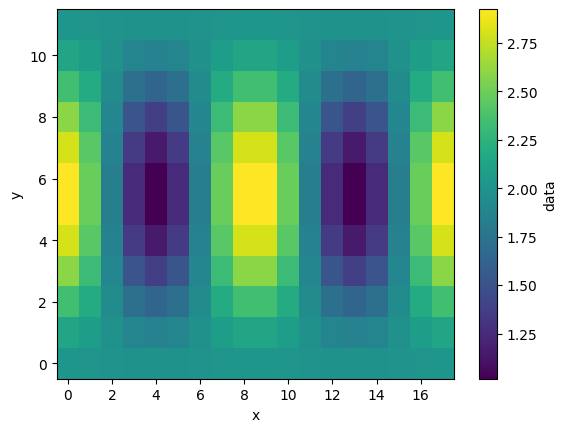

In [4]:
ds_in["data"].plot()

In [5]:
def regrid(ds_in, ds_out, dr_in, method):
    """Convenience function for one-time regridding"""
    regridder = xe.Regridder(ds_in, ds_out, method, periodic=True)
    dr_out = regridder(dr_in)
    return dr_out

### Increasing Resolution

In [6]:
for method in method_list:
    print(method)
    %time ds_fine[method] = regrid(ds_in, ds_fine, ds_in['data'], method)
    print('')

bilinear
CPU times: user 517 ms, sys: 11 ms, total: 528 ms
Wall time: 547 ms

conservative
CPU times: user 62.4 ms, sys: 0 ns, total: 62.4 ms
Wall time: 62.3 ms

conservative_normed
CPU times: user 69.2 ms, sys: 0 ns, total: 69.2 ms
Wall time: 69.3 ms

nearest_s2d
CPU times: user 14.5 ms, sys: 0 ns, total: 14.5 ms
Wall time: 14.5 ms

nearest_d2s
CPU times: user 6.04 ms, sys: 194 µs, total: 6.23 ms
Wall time: 6.22 ms

patch
CPU times: user 477 ms, sys: 5.82 ms, total: 483 ms
Wall time: 483 ms



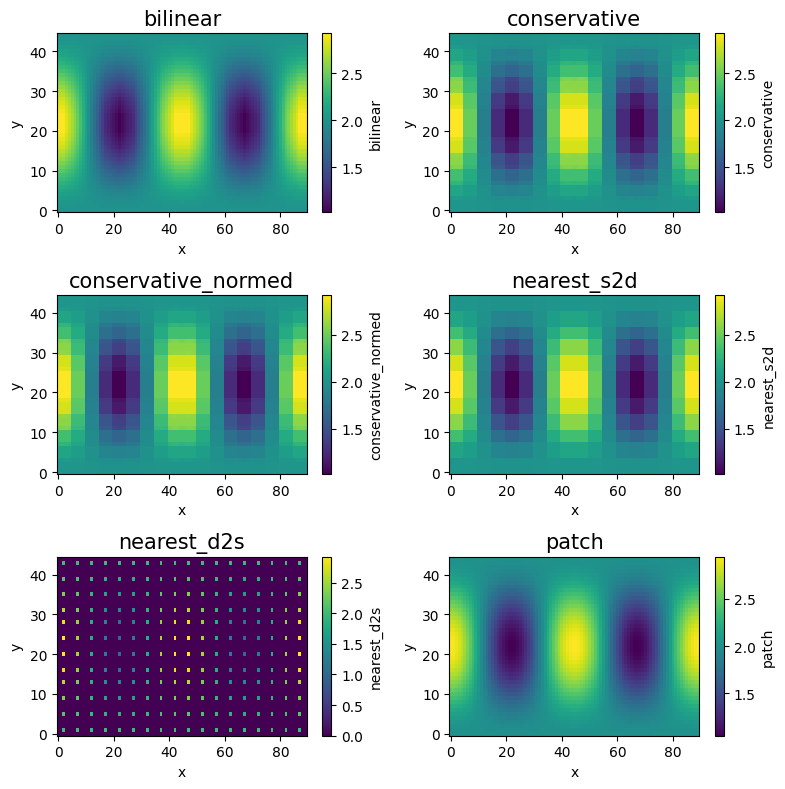

In [7]:
fig, axes = plt.subplots(3, 2, figsize=[8, 8])

for i, method in enumerate(method_list):
    ax = axes.flatten()[i]
    ds_fine[method].plot.pcolormesh(ax=ax)
    ax.set_title(method, fontsize=15)

plt.tight_layout()

### Decreasing Resolution

In [32]:
for method in method_list:
    ds_coarse[method] = regrid(ds_in, ds_coarse, ds_in["data"], method)

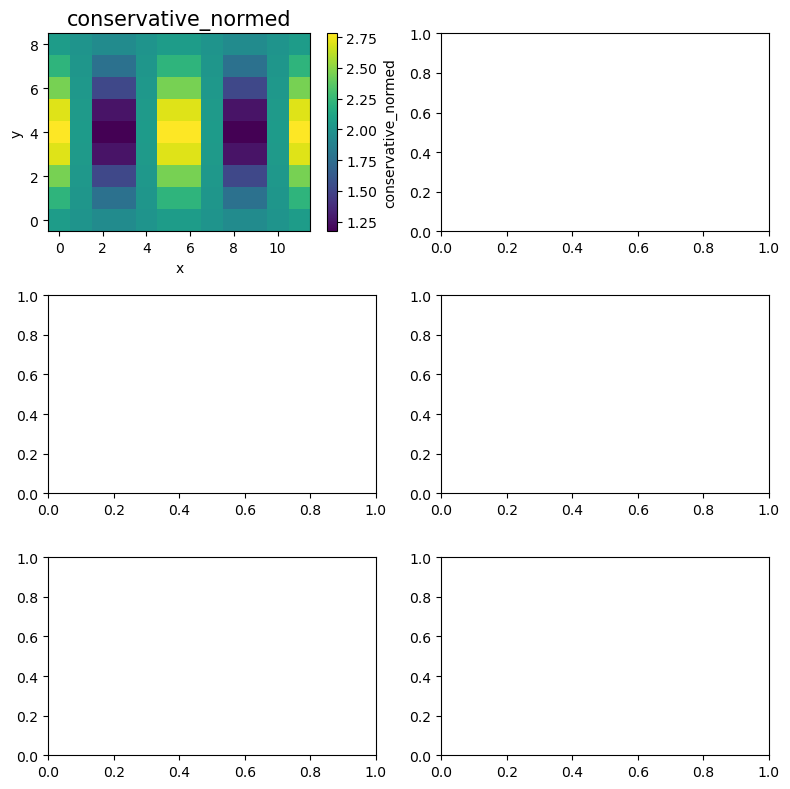

In [33]:
fig, axes = plt.subplots(3, 2, figsize=[8, 8])

for i, method in enumerate(method_list):
    ax = axes.flatten()[i]
    ds_coarse[method].plot.pcolormesh(ax=ax)
    ax.set_title(method, fontsize=15)
plt.tight_layout()

### Test

In [34]:
ds_fine

<xarray.Dataset>
Dimensions:              (y: 45, x: 90, y_b: 46, x_b: 91)
Coordinates:
    lon                  (y, x) float64 -178.0 -174.0 -170.0 ... 174.0 178.0
    lat                  (y, x) float64 -88.0 -88.0 -88.0 ... 88.0 88.0 88.0
    lon_b                (y_b, x_b) float64 -180.0 -176.0 -172.0 ... 176.0 180.0
    lat_b                (y_b, x_b) float64 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    conservative_normed  (y, x) float64 2.016 2.016 2.016 ... 2.016 2.016 2.016